# Modeling

In [1]:
#import the necessary packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
from sklearn.exceptions import DataConversionWarning


warnings.filterwarnings("ignore", category=DataConversionWarning)


In [2]:
#Load our saved data which has already been split to train set and test set
X_train = pd.read_pickle('../data/X_train.pkl')
X_test = pd.read_pickle('../data/X_test.pkl')
y_train = pd.read_pickle('../data/y_train.pkl')
y_test = pd.read_pickle('../data/y_test.pkl')
X = pd.read_csv('../data/features.csv')
y= pd.read_csv('../data/cost.csv')
X = X.drop(columns=['Unnamed: 0'])

To begin our model selection process we try family of linear regression models and tune their hyper parameters. Therefore, we are going to first try plain linear regression, ride regression, lasso regression, eleastic net regression.

In [3]:
# linear regression
linear_reg = LinearRegression()

lr_cv = cross_validate(linear_reg, X_train, y_train, cv=5, scoring='r2', return_train_score=True)

print("Training R2 Scores:", lr_cv['train_score'])
print("Testing R2 Scores:", lr_cv['test_score'])
print("Mean Training R2 Score:", lr_cv['train_score'].mean())
print("Mean Testing R2 Score:", lr_cv['test_score'].mean())

linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
lr_test_mae_mean = mean_absolute_error(y_test, y_pred)
print("MAE on test set is:", lr_test_mae_mean)

Training R2 Scores: [0.58771396 0.50253876 0.52588515 0.50340513 0.51383955]
Testing R2 Scores: [-4.87799034e+20  3.98099574e-01 -1.13774068e-02  2.07546295e-01
  1.25437005e-02]
Mean Training R2 Score: 0.5266765101349445
Mean Testing R2 Score: -9.755980687847788e+19
MAE on test set is: 68178.19523586235


Let's now try ridge regression with hyper-parameter tuning with grid search.

In [4]:
#lets try ridge regression. but first we do grid search cross validation to get the best parameters
ridge_reg = Ridge(random_state=42)

alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = {'alpha': alphas}

ridge_cv = GridSearchCV(estimator=ridge_reg, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)

ridge_cv.fit(X_train, y_train)

print("Best Hyperparameters: ", ridge_cv.best_params_)
print("Best R2 Score: ", ridge_cv.best_score_)

y_pred = ridge_cv.best_estimator_.predict(X_test)
ridge_test_mae_mean = mean_absolute_error(y_test, y_pred)
print("MAE on test set is:", ridge_test_mae_mean)

Best Hyperparameters:  {'alpha': 100.0}
Best R2 Score:  0.30999307168588547
MAE on test set is: 62006.57512795835


In [5]:
# We do the same for lasso regression
lasso_reg = Lasso(random_state=42)

alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]

param_grid = {'alpha': alphas}

lasso_cv = GridSearchCV(estimator=lasso_reg, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)

lasso_cv.fit(X_train, y_train)

print("Best Hyperparameters: ", lasso_cv.best_params_)
print("Best R2 Score: ", lasso_cv.best_score_)

y_pred = lasso_cv.best_estimator_.predict(X_test)
lasso_test_mae_mean = mean_absolute_error(y_test, y_pred)
print("MAE on test set is:", lasso_test_mae_mean)

Best Hyperparameters:  {'alpha': 10000.0}
Best R2 Score:  0.21919346807489398
MAE on test set is: 62567.655917944074


In [6]:
# We do the same for elastic net regression
elastic_net_reg = ElasticNet(random_state=42)

alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

param_grid = {'alpha': alphas, 'l1_ratio': l1_ratios}

elastic_net_cv = GridSearchCV(estimator=elastic_net_reg, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)

elastic_net_cv.fit(X_train, y_train)

print("Best Hyperparameters: ", elastic_net_cv.best_params_)
print("Best R2 Score: ", elastic_net_cv.best_score_)

y_pred = elastic_net_cv.best_estimator_.predict(X_test)
elastic_net_test_mae_mean = mean_absolute_error(y_test, y_pred)
print("MAE on test set is:", elastic_net_test_mae_mean)

Best Hyperparameters:  {'alpha': 1.0, 'l1_ratio': 0.3}
Best R2 Score:  0.3100808268115105
MAE on test set is: 61791.17211896934


Now we try KNN regressor and do grid search to get best k value.

In [7]:
#We do grid search for knn regressor
knn_reg = KNeighborsRegressor()

k_values = np.arange(1, 50)

param_grid = {'n_neighbors': k_values}

knn_cv = GridSearchCV(estimator=knn_reg, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)

knn_cv.fit(X_train, y_train)

print("Best Hyperparameters: ", knn_cv.best_params_)
print("Best R2 Score: ", knn_cv.best_score_)

y_pred = knn_cv.best_estimator_.predict(X_test)
knn_test_mae_mean = mean_absolute_error(y_test, y_pred)
print("MAE on test set is:", knn_test_mae_mean)

Best Hyperparameters:  {'n_neighbors': 16}
Best R2 Score:  0.23838973433450034
MAE on test set is: 65839.14432291666


In [8]:
#We do grid search for support vector regressor
svr_reg = SVR()

param_grid = {
    'C': [0.1, 1, 10, 100, 1000, 10000],
    'kernel': ['linear', 'rbf', 'poly'],
    'epsilon': [0.1, 0.2, 0.5, 1.0]
}

svr_cv = GridSearchCV(estimator=svr_reg, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)

svr_cv.fit(X_train, y_train)

print("Best Hyperparameters: ", svr_cv.best_params_)
print("Best R2 Score: ", svr_cv.best_score_)

y_pred = svr_cv.best_estimator_.predict(X_test)
svr_test_mae_mean = mean_absolute_error(y_test, y_pred)
print("MAE on test set is:", svr_test_mae_mean)

Best Hyperparameters:  {'C': 10000, 'epsilon': 1.0, 'kernel': 'linear'}
Best R2 Score:  0.29015530800640654
MAE on test set is: 61117.09759750714


Now we try our ensemble methods of random forest and gradient boosting. 

In [9]:
# We do grid search for random forest regressor 

rf_reg = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_cv = GridSearchCV(estimator=rf_reg, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)

rf_cv.fit(X_train, y_train)

print("Best Hyperparameters: ", rf_cv.best_params_)
print("Best R2 Score: ", rf_cv.best_score_)

y_pred = rf_cv.best_estimator_.predict(X_test)
rf_test_mae_mean = mean_absolute_error(y_test, y_pred)
print("MAE on test set is:", rf_test_mae_mean)

Best Hyperparameters:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best R2 Score:  0.17851130213943495
MAE on test set is: 58173.15893480668


In [10]:
#We do grid search in gradient boosting regressor
gb_reg = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

gb_cv = GridSearchCV(estimator=gb_reg, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)

gb_cv.fit(X_train, y_train)

print("Best Hyperparameters: ", gb_cv.best_params_)
print("Best R2 Score: ", gb_cv.best_score_)

y_pred = gb_cv.best_estimator_.predict(X_test)
gb_test_mae_mean = mean_absolute_error(y_test, y_pred)
print("MAE on test set is:", gb_test_mae_mean)

Best Hyperparameters:  {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 150}
Best R2 Score:  0.12569202399699228
MAE on test set is: 64560.79172685727


Of all the models random forest did the best in our test set. now lets plot the feature importance each feature

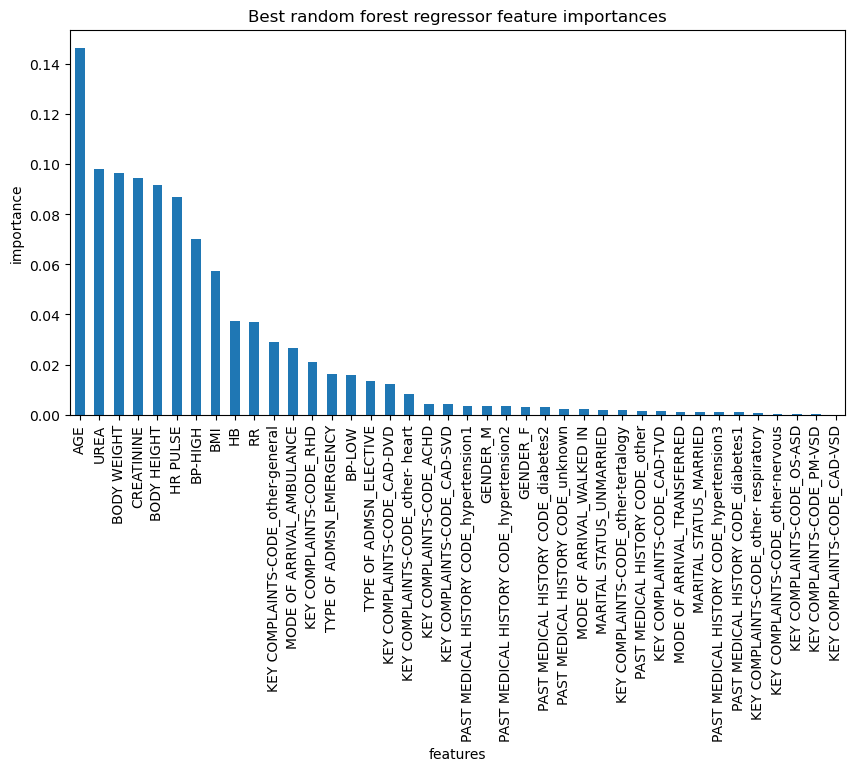

In [11]:
#let's plot the importance of each feature

plt.subplots(figsize=(10, 5))
imps = rf_cv.best_estimator_.feature_importances_
rf_feat_imps = pd.Series(imps, index=X.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

We want to see if increasing the number of training data would have imporved our result. We makd a plot to check that.

In [12]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(rf_cv.best_estimator_, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

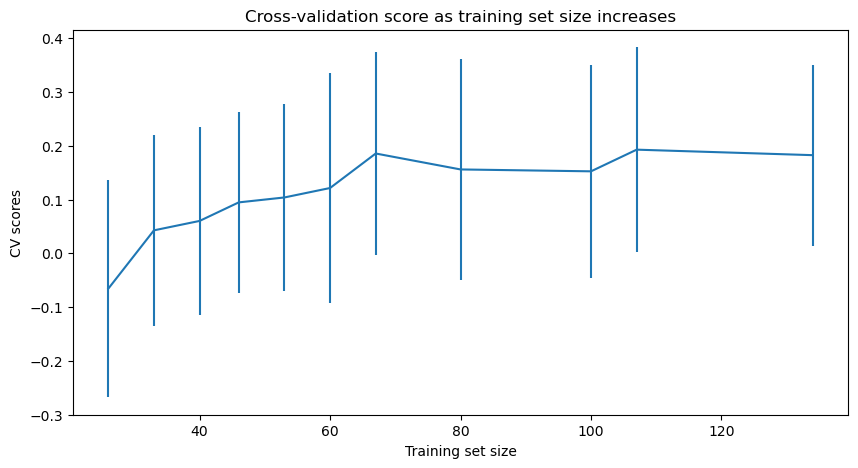

In [13]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

The model doesn't seem to improve much after 70 training size. Therefore, collecting more data may not improve our model

The mean absolute error for our best model (random forest) was 58173.16. To get the percent error we divide our mean absolute error by the mean of our target variable and multiply it hundred

In [14]:
mae_pct = (rf_test_mae_mean/np.mean(y_test))*100
print("Mean Absolute Error percentage:",mae_pct)

Mean Absolute Error percentage: 29.377442753570175


Therefore, On average we were able to predict total cost within 29.4% of the actual total cost